#### Importing the libraries and setting configs

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#### Importing data

In [27]:
raw_df = pd.read_csv('movies.csv', sep=',', engine='python')
raw_df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


#### Checking for missing data


In [29]:
for col in raw_df.columns:
    pct_missing = np.mean(raw_df[col].isnull())
    print(f'{col} - {pct_missing}%')

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


#### Data types

In [30]:
raw_df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [33]:
# Changing ''budget'' and ''gross'' to int64

raw_df['budget'] = raw_df['budget'].astype('int64')
raw_df['gross'] = raw_df['gross'].astype('int64')

raw_df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


#### Correcting the year column

In [35]:
raw_df['corrected_year'] = raw_df['released'].astype(str).str[:4]
raw_df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


#### Order by

In [39]:
pd.set_option('max_rows', None)

In [71]:
raw_df.sort_values(by=['gross'], inplace=True, ascending=False)

#### Drop duplicates, if any (we don't have them)

In [45]:
raw_df_2 = raw_df.copy()

In [81]:
raw_df_2.drop_duplicates().head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [47]:
raw_df_2.shape

(6820, 16)

In [49]:
raw_df.shape

(6820, 16)

#### Correlations

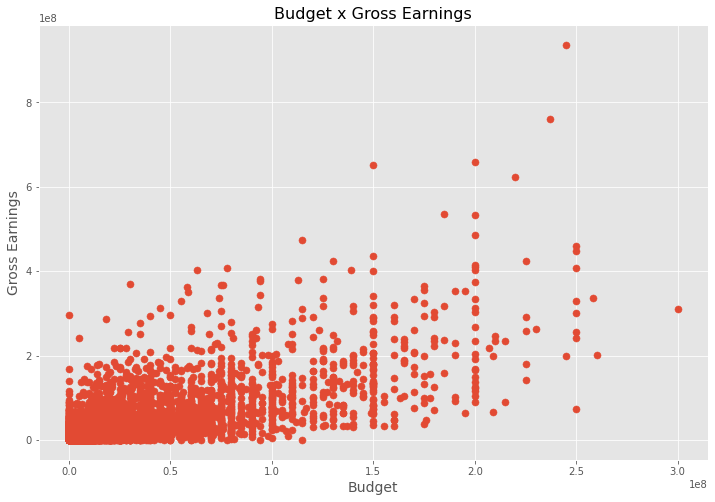

In [62]:
## budget x gross ##

plt.scatter(x=raw_df['budget'], y=raw_df['gross'], s=50)
plt.title('Budget x Gross Earnings', fontsize=16)
plt.xlabel('Budget', fontsize=14), plt.ylabel('Gross Earnings', fontsize=14)
plt.show()

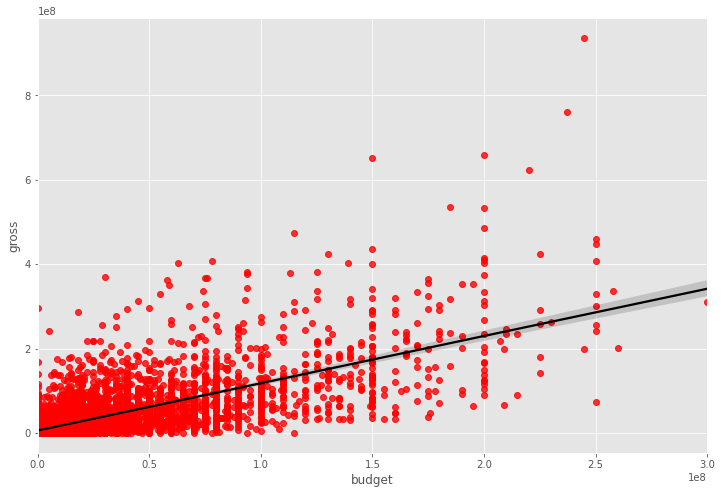

In [65]:
## budget x gross with seaborn ##

sns.regplot(x='budget', y='gross', data=raw_df, scatter_kws={'color': 'red'}, line_kws={'color': 'black'})

In [66]:
# Correlation Matrix (Pearson by default)

corr_matrix = raw_df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


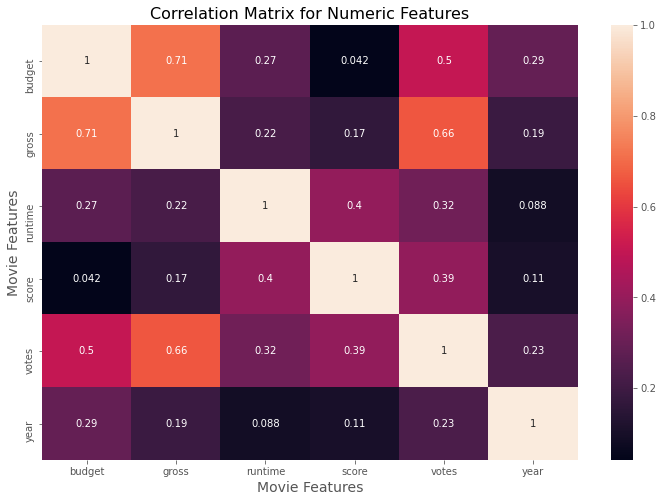

In [68]:
corr_matrix = raw_df.corr()
sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features', fontsize=16)
plt.xlabel('Movie Features', fontsize=14), plt.ylabel('Movie Features', fontsize=14)

plt.show()

In [80]:
# Numer

df_numerized = raw_df.copy()

for col in df_numerized.columns:
    if (df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26


In [79]:
raw_df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


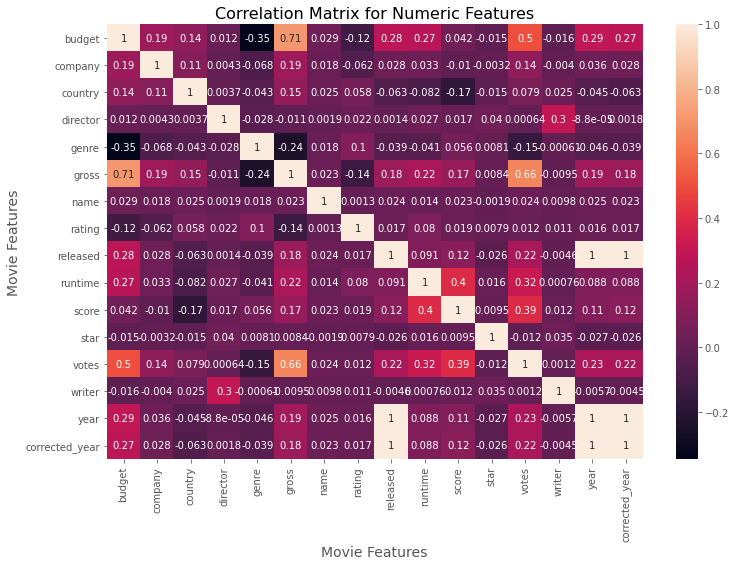

In [74]:
corr_matrix = df_numerized.corr()
sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features', fontsize=16)
plt.xlabel('Movie Features', fontsize=14), plt.ylabel('Movie Features', fontsize=14)

plt.show()

In [87]:
## Unstacking the pairs!

corr_matrix_numerized = df_numerized.corr()

corr_pairs = corr_matrix_numerized.unstack()
corr_pairs.head()

budget  budget      1.000000
        company     0.187205
        country     0.137635
        director    0.011602
        genre      -0.346794
dtype: float64

In [86]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs.head()

corrected_year  corrected_year    1.0
year            year              1.0
company         company           1.0
country         country           1.0
director        director          1.0
dtype: float64

In [78]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr.head

corrected_year  corrected_year    1.000000
year            year              1.000000
company         company           1.000000
country         country           1.000000
director        director          1.000000
genre           genre             1.000000
gross           gross             1.000000
name            name              1.000000
rating          rating            1.000000
released        released          1.000000
runtime         runtime           1.000000
score           score             1.000000
star            star              1.000000
votes           votes             1.000000
writer          writer            1.000000
budget          budget            1.000000
released        corrected_year    0.999389
corrected_year  released          0.999389
year            corrected_year    0.996229
corrected_year  year              0.996229
year            released          0.996187
released        year              0.996187
budget          gross             0.712196
gross      